In [43]:
from sqlalchemy import create_engine, desc, asc

In [44]:
from sqlalchemy.orm import sessionmaker

In [45]:
from sqlalchemy.ext.declarative import declarative_base

In [46]:
from sqlalchemy import Column, Integer, String, Float, DateTime, Date

In [47]:
import sqlite3

In [48]:
import pandas as pd

In [49]:
import numpy as np

In [50]:
from matplotlib import pyplot as plt

In [51]:
engine = create_engine("sqlite:///history.db")

In [52]:
Base = declarative_base()

In [53]:
Session = sessionmaker(bind=engine)

In [54]:
session = Session()

In [55]:
class History(Base):
    __tablename__ = 'histories'

    id = Column(Integer, primary_key=True)
    date = Column(Date)
    open_price = Column(Float)
    high_price = Column(Float)
    low_price = Column(Float)
    close_price = Column(Float)
    
    def __init__(self, date, open_price, high_price, low_price, close_price):
        self.date = date
        self.open_price = open_price
        self.high_price = high_price
        self.low_price = low_price
        self.close_price = close_price
    
    def __repr__(self):
        return "<History(date='%s', open_price ='%f', high_price='%f', low_price='%f', close_price='%f')>" % (
            self.date, self.open_price, self.high_price, self.low_price, self.close_price)

In [56]:
def add(date, open_price, high_price, low_price, close_price):
    h1 = History(date=date, open_price=open_price, high_price=high_price, low_price=low_price, close_price=close_price)
    session.add(h1)

In [57]:
def commit():
    session.commit()

In [58]:
# Base.metadata.create_all(engine)

In [59]:
# conn = sqlite3.connect('history.db')
# query = "SELECT * FROM histories"
# df = pd.read_sql_query(query, conn)
# print(df)

session = Session()
for row in session.query(History).order_by(asc(History.date)).all():
    print(f"low: {row.low_price} / high: {row.high_price} / open: {row.open_price} / close: {row.close_price} / date: {row.date}")

low: 2376.29 / high: 2615.25 / open: 2590.57 / close: 2478.45 / date: 2017-06-26
low: 2332.99 / high: 2552.45 / open: 2478.45 / close: 2552.45 / date: 2017-06-27
low: 2484.42 / high: 2603.98 / open: 2553.03 / close: 2574.79 / date: 2017-06-28
low: 2510.48 / high: 2588.83 / open: 2567.56 / close: 2539.32 / date: 2017-06-29
low: 2478.43 / high: 2559.25 / open: 2539.24 / close: 2480.84 / date: 2017-06-30
low: 2419.23 / high: 2515.27 / open: 2492.6 / close: 2434.55 / date: 2017-07-01
low: 2394.84 / high: 2514.28 / open: 2436.4 / close: 2506.47 / date: 2017-07-02
low: 2480.47 / high: 2595.0 / open: 2498.56 / close: 2564.06 / date: 2017-07-03
low: 2559.35 / high: 2631.59 / open: 2561.0 / close: 2601.64 / date: 2017-07-04
low: 2538.55 / high: 2622.65 / open: 2602.87 / close: 2601.99 / date: 2017-07-05
low: 2581.69 / high: 2616.72 / open: 2608.1 / close: 2608.56 / date: 2017-07-06
low: 2498.87 / high: 2916.14 / open: 2608.59 / close: 2518.66 / date: 2017-07-07
low: 2492.31 / high: 2571.34 / op

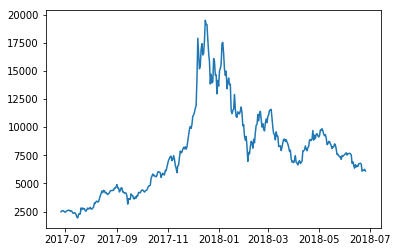

In [60]:
session = Session()
result = session.query(History).order_by(asc(History.date)).all()
data = []
index = []
for row in result:
    index.append(row.date)
    data.append(row.close_price)

ts = pd.Series(data, index=index)
ts.plot()

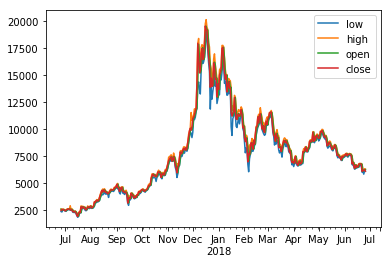

In [64]:
low_price = []
high_price = []
open_price = []
close_price = []
index = []

session = Session()
for row in session.query(History).order_by(asc(History.date)).all():
    low_price.append(row.low_price)
    high_price.append(row.high_price)
    open_price.append(row.open_price)
    close_price.append(row.close_price)
    index.append(pd.Timestamp(row.date))

prices = {
    'low' : low_price,
    'high' : high_price,
    'open' : open_price,
    'close' : close_price
}
    
#print(prices)

df = pd.DataFrame(prices, index=index)
df.plot()

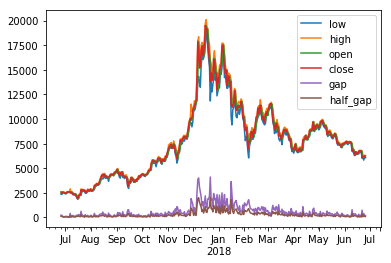

In [65]:
gap = []
half_gap = []

for i in range(0, len(prices['low'])):
    gap_row = prices['high'][i] - prices['low'][i]
    half_gap_row = gap_row * 0.5
        
    gap.append(gap_row)
    half_gap.append(half_gap_row)
    
prices['gap'] = gap
prices['half_gap'] = half_gap

# print(prices)

df = pd.DataFrame(prices, index=index)
df.plot()

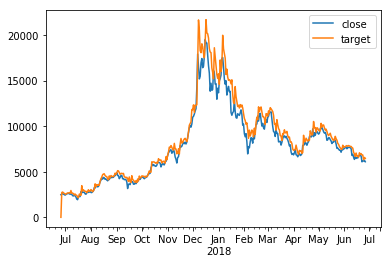

In [66]:
target = [-1]

for i in range(1, len(prices['low'])):
    target_row = prices['open'][i] + prices['gap'][i - 1]
    target.append(target_row)


prices['target'] = target

df = pd.DataFrame({'close' : prices['close'], 'target' : prices['target']}, index)
df.plot()